In [1]:
import pandas as pd
from scipy import spatial
from openpyxl import load_workbook
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
clean_filepath = "/Users/kylieleblancKylie/domino/docsim/data/clean/"
table_filepath = "/Users/kylieleblancKylie/domino/docsim/results/"

In [3]:
docs = pd.read_csv(clean_filepath + 'text_corpus.csv')
docs = docs.set_index('doc')
docs.sample(5)

,text,year,semester
doc,,,
75-2C.docx,How do you feel about that first one? Righ...,2017-18,spring
2018_101_3C_Transcript.docx,How do you think that went. . Okay. . ...,2018-19,fall
61-2C.docx,"Um, how are you feeling about that first run...",2017-18,spring
2019_75_5C_Transcript.docx,"Alright. So, how do you feel about it? ...",2018-19,spring
109-2C.docx,How do you feel about that? The first one-- ...,2017-18,spring


In [4]:
def distance_to_ideal(df, semester, year, matrix, matrix_ideal):
    centroid = np.mean(matrix_ideal)
    for maindoc in list(df[(docs.year == year) & (df.semester == semester)].index):
        pairwise_sim = []
        sim = 1 - spatial.distance.cosine(matrix.loc[maindoc], centroid)
        pairwise_sim.append(sim)
        average = sum(pairwise_sim)/len(pairwise_sim) # don't include relationship with self
        df.at[maindoc, 'to_ideal'] = average
    return df

In [5]:
file = table_filepath + 'Spring 2018 Results.xlsx'
wb = load_workbook(file)
ws = wb.active

# No pre-processing

In [6]:
results_corpus = docs.copy()
results_corpus.sample()

,text,year,semester
doc,,,
32-2C.docx,And how are you feeling about that? The firs...,2017-18,spring


In [7]:
matrix_corpus = pd.read_csv(clean_filepath + 'matrix_corpus.csv')
matrix_corpus = matrix_corpus.set_index('doc')
matrix_corpus.sample(5)

,10,100,12,15,16,20,29,30,40,7th,...,york,you,young,younger,your,yours,yourself,yup,zen,zone
doc,,,,,,,,,,,,,,,,,,,,,
2018_88_3C_Transcript.docx,0,0,0,0,0,0,0,0,0,0,...,0,24,0,0,4,0,0,0,0,0
49-2C.docx,0,0,0,0,0,0,0,0,0,0,...,0,56,0,0,2,0,0,0,0,0
107-2C.docx,0,0,0,0,0,0,0,0,0,0,...,0,70,0,0,9,0,0,1,0,0
2019_16_5C_TC Transcript.docx,0,0,0,0,0,1,0,0,0,0,...,0,46,0,0,3,0,0,0,0,0
96-2C.docx,1,0,0,0,0,0,0,0,0,0,...,0,39,0,0,6,0,0,0,0,0


In [9]:
matrix_ideal = pd.read_csv(clean_filepath + 'matrix_ideal.csv')
matrix_ideal = matrix_ideal.set_index('doc')
matrix_ideal

,10,100,12,15,16,20,29,30,40,7th,...,york,you,young,younger,your,yours,yourself,yup,zen,zone
doc,,,,,,,,,,,,,,,,,,,,,
Classroom Management Model C.docx,0,0,0,0,0,0,0,0,0,0,...,0,21,0,0,5,0,0,0,0,0
Classroom Management Model B.docx,0,0,0,0,0,0,0,0,0,0,...,0,23,0,0,3,0,0,0,0,0
Classroom Management Model D.docx,0,0,0,0,0,0,0,0,0,0,...,0,21,0,0,4,0,1,0,0,0
Classroom Management Model A.docx,0,0,0,0,0,0,0,0,0,0,...,0,17,0,0,5,0,0,0,0,0


In [9]:
distance_to_ideal(results_corpus, 'spring', '2018-19', matrix_corpus, matrix_ideal)
value = results_corpus[(results_corpus.year == '2018-19') & (results_corpus.semester == 'spring')].to_ideal.mean().round(2)
print(value)
ws.cell(row= 16, column= 2).value = value
wb.save(file)
results_corpus.sample(5)

0.8


,text,year,semester,to_ideal
doc,,,,
2018_98_3C_Transcript.docx,"Um, so, how do you feel about that simulati...",2018-19,fall,NaN
96-2C.docx,Okay I'm glad you made it. Um- so how do...,2017-18,spring,NaN
2018_82_3C_Transcript.docx,so how are you feeling the first time ? ...,2018-19,fall,NaN
46-2C.docx,"So, how you feeling? How you think that went...",2017-18,spring,NaN
2019_16_5C_TC Transcript.docx,"So, first thing is talk to me about what yo...",2018-19,spring,0.85324


# Remove stop words

In [10]:
results_corpus_stop = docs.copy()
results_corpus_stop.sample()

,text,year,semester
doc,,,
2018_80_3C_Transcript.docx,"So, I would love to hear what – how did you...",2018-19,fall


In [11]:
matrix_corpus_stop = pd.read_csv(clean_filepath + 'matrix_corpus_stop.csv')
matrix_corpus_stop = matrix_corpus_stop.set_index('doc')
matrix_corpus_stop.sample(5)

,10,100,12,15,16,20,29,30,40,7th,...,yes,yesterday,yet,yo,york,young,younger,yup,zen,zone
doc,,,,,,,,,,,,,,,,,,,,,
37-2C.docx,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,0
2018_14_3C_Transcript.docx,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019_107_5C_Transcript.docx,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019_87_5C_Transcript.docx,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019_20_5C_Transcript.docx,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
matrix_ideal_stop = pd.read_csv(clean_filepath + 'matrix_ideal_stop.csv')
matrix_ideal_stop = matrix_ideal_stop.set_index('doc')

In [13]:
distance_to_ideal(results_corpus_stop, 'spring', '2018-19', matrix_corpus_stop, matrix_ideal_stop)
value = results_corpus_stop[(results_corpus_stop.year == '2018-19') & (results_corpus_stop.semester == 'spring')].to_ideal.mean().round(2)
print(value)
ws.cell(row= 16, column= 3).value = value
wb.save(file)
results_corpus_stop.sample(5)

0.41


,text,year,semester,to_ideal
doc,,,,
108-2C.docx,"So how you-how you feel, what do you think? ...",2017-18,spring,NaN
2018_109_3C_Transcript.docx,How do you think that went? Went well for y...,2018-19,fall,NaN
2018_94_3C_Transcript.docx,"Alright. So, first of all, how do you feel ...",2018-19,fall,NaN
2019_34_5C_Transcript.docx,"So, how are you feeling about that first sim...",2018-19,spring,0.47056
123-2C.docx,"Um, so how do you feel about that first simu...",2017-18,spring,NaN


# Stop and Stem

In [14]:
results_corpus_stop_stem = docs.copy()
results_corpus_stop_stem.sample()

matrix_corpus_stop_stem = pd.read_csv(clean_filepath + 'matrix_corpus_stop_stem.csv')
matrix_corpus_stop_stem = matrix_corpus_stop_stem.set_index('doc')

matrix_ideal_stop_stem = pd.read_csv(clean_filepath + 'matrix_ideal_stop_stem.csv')
matrix_ideal_stop_stem = matrix_ideal_stop_stem.set_index('doc')

distance_to_ideal(results_corpus_stop_stem, 'spring', '2018-19', matrix_corpus_stop_stem, matrix_ideal_stop_stem)
value = results_corpus_stop_stem[(results_corpus_stop_stem.year == '2018-19')
                            & (results_corpus_stop_stem.semester == 'spring')].to_ideal.mean().round(2)
print(value)
ws.cell(row= 16, column= 4).value = value
wb.save(file)
results_corpus_stop.sample(5)

0.93


,text,year,semester,to_ideal
doc,,,,
2019_40_5C_Transcript.docx,"Oh, do you have – no, okay, so how are you ...",2018-19,spring,0.491966
2018_101_3C_Transcript.docx,How do you think that went. . Okay. . ...,2018-19,fall,NaN
2018_23_3C Transcript.docx,So how do you feel that that went? – yeah...,2018-19,fall,NaN
2019_62_5C_Transcript.docx,"Yes. Hello. So, how are you feeling ab...",2018-19,spring,0.409940
14-2C.docx,So how do you feel about that first one? Y...,2017-18,spring,NaN


# Stop Stem Weight

In [15]:
results_corpus_stop_stem_wgt = docs.copy()
results_corpus_stop_stem_wgt.sample()

matrix_corpus_stop_stem_wgt = pd.read_csv(clean_filepath + 'matrix_corpus_stop_stem_wgt.csv')
matrix_corpus_stop_stem_wgt = matrix_corpus_stop_stem_wgt.set_index('doc')
matrix_corpus_stop_stem_wgt.sample(5)

matrix_ideal_stop_stem_wgt = pd.read_csv(clean_filepath + 'matrix_ideal_stop_stem_wgt.csv')
matrix_ideal_stop_stem_wgt = matrix_ideal_stop_stem_wgt.set_index('doc')

distance_to_ideal(results_corpus_stop_stem_wgt, 'spring', '2018-19', matrix_corpus_stop_stem_wgt, matrix_ideal_stop_stem_wgt)
value = results_corpus_stop_stem_wgt[(results_corpus_stop_stem_wgt.year == '2018-19')
                            & (results_corpus_stop_stem_wgt.semester == 'spring')].to_ideal.mean().round(2)
print(value)
ws.cell(row= 16, column= 5).value = value
wb.save(file)
results_corpus_stop.sample(5)

0.79


,text,year,semester,to_ideal
doc,,,,
2019_98_5C_Transcript.docx,"Sit down right here. Okay. So, so how do ...",2018-19,spring,0.390605
40-2C.docx,"So, how are you feeling, after you- what'd yo...",2017-18,spring,NaN
2018_23_3C Transcript.docx,So how do you feel that that went? – yeah...,2018-19,fall,NaN
2019_25_5C_Transcript.docx,"So, how do you feel about that first go in ...",2018-19,spring,0.464338
2018_82_3C_Transcript.docx,so how are you feeling the first time ? ...,2018-19,fall,NaN


# LSA

In [16]:
results_corpus_lsa = docs.copy()
results_corpus_lsa.sample()

matrix_corpus = pd.read_csv(clean_filepath + 'matrix_corpus.csv')
matrix_corpus = matrix_corpus.set_index('doc')
matrix_corpus.sample(5)

matrix_ideal = pd.read_csv(clean_filepath + 'matrix_ideal.csv')
matrix_ideal = matrix_ideal.set_index('doc')

matrix = matrix_corpus.append(matrix_ideal)
matrix.sample()

,10,100,12,15,16,20,29,30,40,7th,...,york,you,young,younger,your,yours,yourself,yup,zen,zone
doc,,,,,,,,,,,,,,,,,,,,,
111-2C.docx,0,0,0,0,0,0,0,0,0,0,...,0,57,0,0,5,0,0,1,0,0


In [17]:
lsa = TruncatedSVD(n_components = 100, random_state = 100)
lsa_fit = lsa.fit_transform(matrix)
lsa_fit = Normalizer(copy=False).fit_transform(lsa_fit)
print(lsa_fit.shape)
lsa_fit

(164, 100)


array([[ 0.90054568, -0.23552622, -0.0946571 , ...,  0.00296297,
         0.04016734,  0.01923381],
       [ 0.89132911, -0.2367827 , -0.21080784, ...,  0.01354937,
         0.00500984, -0.00399971],
       [ 0.86428364, -0.28435873, -0.15651405, ...,  0.00704462,
        -0.00131306, -0.01314305],
       ...,
       [ 0.8374379 , -0.10169827,  0.06783158, ...,  0.03134166,
         0.01676856,  0.00729321],
       [ 0.83603664, -0.15019252,  0.01672141, ...,  0.01398064,
        -0.01528871, -0.02018005],
       [ 0.79471975, -0.17184949,  0.07908881, ..., -0.04173202,
         0.01210755,  0.03135714]])

In [18]:
## Each LSA component is a linear combo of words
word_weights = pd.DataFrame(lsa.components_, columns = matrix.columns)
word_weights

,10,100,12,15,16,20,29,30,40,7th,...,york,you,young,younger,your,yours,yourself,yup,zen,zone
0,0.000065,0.000161,0.000149,0.000069,0.000087,0.000428,0.000090,0.000495,0.000110,0.000085,...,0.000139,0.547014,0.000093,0.000371,0.040384,0.000158,0.001361,0.000496,0.000095,0.000283
1,0.000087,-0.001284,-0.000005,-0.000256,-0.000093,0.000531,-0.000762,0.001085,0.000869,0.000819,...,-0.000869,0.235905,-0.000080,0.002704,0.024235,0.000500,0.003792,0.000321,-0.000091,0.000009
2,0.000722,-0.001208,-0.000872,-0.000246,0.000731,0.000024,-0.000227,0.000556,-0.000394,-0.001198,...,-0.000916,0.420132,-0.000101,-0.002696,0.060915,0.000161,-0.001109,0.002907,0.000892,0.002234
3,-0.000286,-0.000255,-0.000785,-0.000467,0.000432,0.001235,-0.000579,0.000288,-0.000094,-0.000028,...,-0.000348,0.019481,0.001145,-0.001615,-0.047441,-0.000047,-0.001371,-0.001098,0.000507,0.001362
4,-0.000419,0.000280,-0.000239,-0.000964,0.001390,-0.000269,-0.000595,0.001158,-0.000339,0.000658,...,-0.001439,-0.283892,-0.000229,0.001770,0.014230,0.000381,-0.005063,0.000037,0.000796,-0.000250
5,0.000544,0.000138,-0.000541,-0.001060,-0.000390,-0.001817,-0.000044,-0.001192,-0.000212,0.000032,...,-0.001321,-0.090449,0.001332,0.000459,0.064579,0.000498,-0.002722,0.002800,-0.000908,-0.002161
6,0.000834,0.001272,-0.000073,0.000246,-0.000178,0.002641,0.000524,-0.002640,-0.000942,-0.000608,...,0.000044,0.123731,-0.000715,0.000090,0.045158,0.001653,-0.011289,0.004458,0.000281,-0.000274
7,-0.000727,-0.002935,-0.001505,-0.000327,-0.000896,-0.000813,0.000972,0.002963,0.000674,-0.000091,...,-0.001607,0.180933,0.000668,-0.001320,-0.001091,0.000347,-0.003271,-0.000648,-0.000451,0.004408
8,0.001344,-0.004487,-0.001083,0.000372,-0.000529,0.002473,0.001994,-0.000394,0.000056,-0.000530,...,0.000636,-0.221910,0.000243,-0.001769,0.018622,0.000791,-0.002202,0.000955,-0.000639,-0.001297
9,-0.000577,0.003846,0.003196,-0.000575,-0.001442,0.001143,0.001961,0.000524,0.000205,0.000057,...,0.000553,-0.298200,0.001351,0.004714,-0.004492,-0.000752,0.003513,-0.002764,-0.000062,-0.000474


In [19]:
## Each document is a linear combination of components
matrix_lsa = pd.DataFrame(lsa_fit, index = matrix.index, columns = word_weights.index)
matrix_lsa.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
doc,,,,,,,,,,,,,,,,,,,,,
2018_90_3C_Transcript.docx,0.906351,-0.147869,-0.053020,-0.160020,-0.181578,-0.056694,0.057613,0.018594,0.003509,0.037308,...,-0.015238,-0.026038,-0.008269,0.009383,-0.013758,0.007171,0.032669,0.016512,0.021955,0.017356
2018_49_3C Transcript.docx,0.906288,-0.201204,-0.102768,-0.146207,0.156571,0.020768,-0.017667,0.100751,0.014304,-0.053047,...,0.017224,-0.044220,-0.004655,-0.006652,0.018532,0.010078,0.039253,-0.000246,-0.007421,-0.005382
123-2C.docx,0.851802,0.008156,0.253763,-0.160631,0.067053,0.250328,0.113772,-0.055554,-0.016621,0.005319,...,0.010370,0.009797,0.025889,0.021537,0.031158,0.019913,-0.020439,0.023161,0.005977,-0.012815
113-2C.docx,0.906138,0.211328,-0.109241,-0.160153,0.018563,-0.028360,0.002268,-0.023215,-0.001980,0.157878,...,-0.008194,0.010630,0.005203,-0.003043,-0.006847,0.006710,0.024053,-0.003880,-0.012606,-0.032560
2019_49_5C_Transcript.docx,0.926271,0.067263,-0.167764,0.070012,0.094925,0.027442,0.072724,0.043326,0.053939,0.071688,...,0.082009,0.003469,-0.011844,-0.000735,0.026076,-0.011123,-0.005961,-0.028184,0.025772,0.010471


In [20]:
matrix_ideal_lsa = matrix_lsa[matrix_lsa.index.str.contains('Model')]
matrix_corpus_lsa = matrix_lsa[~matrix_lsa.index.str.contains('Model')]

In [21]:
distance_to_ideal(results_corpus_lsa, 'spring', '2018-19', matrix_corpus_lsa, matrix_ideal_lsa)
value = results_corpus_lsa[(results_corpus_lsa.year == '2018-19')
                            & (results_corpus_lsa.semester == 'spring')].to_ideal.mean().round(2)
print(value)
ws.cell(row= 16, column= 6).value = value
wb.save(file)
results_corpus_lsa.sample(5)

0.8


,text,year,semester,to_ideal
doc,,,,
2019_106_5C_Transcript.docx,So tell me how you feel about your first si...,2018-19,spring,0.807736
2018_90_3C_Transcript.docx,"So, UM how do you think that went? . It ...",2018-19,fall,NaN
116-2C.docx,So how do you feel about that first one? Y...,2017-18,spring,NaN
2018_8_3C_Transcript.docx,"Okay, good. So hopefully you’re feeling g...",2018-19,fall,NaN
38-2C.docx,I wanna start first with how you think that...,2017-18,spring,NaN


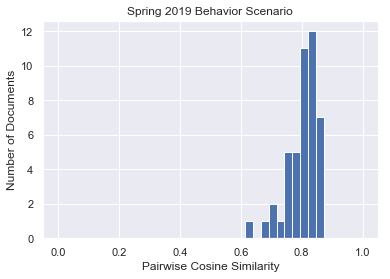

In [22]:
sns.set()
bins = np.linspace(0, 1, num = 40)
plt.hist(results_corpus_lsa[(results_corpus_lsa.year == '2018-19') & (results_corpus_lsa.semester == 'spring')].to_ideal, bins)
plt.title("Spring 2019 Behavior Scenario")
plt.xlabel('Pairwise Cosine Similarity')
plt.ylabel('Number of Documents')
plt.savefig(table_filepath + "spring2019_deviance_hist.png")
plt.show()

In [23]:
reuslts_corpus_lsa[(results_corpus_lsa.year == '2018-19') & (results_corpus_lsa.semester == 'spring')].to_ideal

NameError: name 'reuslts_corpus_lsa' is not defined

# LSA and Weighting

In [ ]:
results_corpus_wgt_lsa = docs.copy()
results_corpus_wgt_lsa.sample()

matrix_corpus_wgt = pd.read_csv(clean_filepath + 'matrix_corpus_wgt.csv')
matrix_corpus_wgt = matrix_corpus_wgt.set_index('doc')

matrix_ideal_wgt = pd.read_csv(clean_filepath + 'matrix_ideal_wgt.csv')
matrix_ideal_wgt = matrix_ideal_wgt.set_index('doc')

matrix_wgt = matrix_corpus_wgt.append(matrix_ideal_wgt)

lsa = TruncatedSVD(n_components = 100, random_state = 100)
lsa_fit = lsa.fit_transform(matrix_wgt)
lsa_fit = Normalizer(copy=False).fit_transform(lsa_fit)
print(lsa_fit.shape)
lsa_fit

## Each LSA component is a linear combo of words
word_weights = pd.DataFrame(lsa.components_, columns = matrix_wgt.columns)
word_weights.head()

## Each document is a linear combination of components
matrix_wgt_lsa = pd.DataFrame(lsa_fit, index = matrix_wgt.index, columns = word_weights.index)
matrix_wgt_lsa.sample(5)

matrix_ideal_wgt_lsa = matrix_wgt_lsa[matrix_wgt_lsa.index.str.contains('Model')]
matrix_corpus_wgt_lsa = matrix_wgt_lsa[~matrix_wgt_lsa.index.str.contains('Model')]

distance_to_ideal(results_corpus_wgt_lsa, 'spring', '2018-19', matrix_corpus_wgt_lsa, matrix_ideal_wgt_lsa)
value = results_corpus_wgt_lsa[(results_corpus_wgt_lsa.year == '2018-19')
                            & (results_corpus_wgt_lsa.semester == 'spring')].to_ideal.mean().round(2)
print(value)
ws.cell(row= 16, column= 7).value = value
wb.save(file)
results_corpus_wgt_lsa.sample(5)

# Stop, Weight, and LSA

In [ ]:
results_corpus_stop_wgt_lsa = docs.copy()
results_corpus_stop_wgt_lsa.sample()

matrix_corpus_stop_wgt = pd.read_csv(clean_filepath + 'matrix_corpus_stop_wgt.csv')
matrix_corpus_stop_wgt = matrix_corpus_stop_wgt.set_index('doc')

matrix_ideal_stop_wgt = pd.read_csv(clean_filepath + 'matrix_ideal_stop_wgt.csv')
matrix_ideal_stop_wgt = matrix_ideal_stop_wgt.set_index('doc')

matrix_stop_wgt = matrix_corpus_stop_wgt.append(matrix_ideal_stop_wgt)

lsa = TruncatedSVD(n_components = 100, random_state = 100)
lsa_fit = lsa.fit_transform(matrix_stop_wgt)
lsa_fit = Normalizer(copy=False).fit_transform(lsa_fit)
print(lsa_fit.shape)
lsa_fit

## Each LSA component is a linear combo of words
word_weights = pd.DataFrame(lsa.components_, columns = matrix_stop_wgt.columns)
word_weights.head()

## Each document is a linear combination of components
matrix_stop_wgt_lsa = pd.DataFrame(lsa_fit, index = matrix_stop_wgt.index, columns = word_weights.index)
matrix_stop_wgt_lsa.sample(5)

matrix_ideal_stop_wgt_lsa = matrix_stop_wgt_lsa[matrix_stop_wgt_lsa.index.str.contains('Model')]
matrix_corpus_stop_wgt_lsa = matrix_stop_wgt_lsa[~matrix_stop_wgt_lsa.index.str.contains('Model')]

distance_to_ideal(results_corpus_stop_wgt_lsa, 'spring', '2018-19', matrix_corpus_stop_wgt_lsa, matrix_ideal_stop_wgt_lsa)
value = results_corpus_stop_wgt_lsa[(results_corpus_stop_wgt_lsa.year == '2018-19')
                            & (results_corpus_stop_wgt_lsa.semester == 'spring')].to_ideal.mean().round(2)
print(value)
ws.cell(row= 16, column= 8).value = value
wb.save(file)
results_corpus_stop_wgt_lsa.sample(5)

In [ ]:
sns.set()
bins = np.linspace(0, 1, num = 40)
plt.hist(results_corpus_stop_wgt_lsa[(results_corpus_stop_wgt_lsa.year == '2018-19') & (results_corpus_stop_wgt_lsa.semester == 'spring')].to_ideal, bins)
plt.title("Spring 2019 Behavior Scenario")
plt.xlabel('Pairwise Cosine Similarity')
plt.ylabel('Number of Documents')
plt.savefig(table_filepath + "spring2019_deviance_hist.png")
plt.show()